In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from utils.print import print_block
from data.dataset import REFLACXWithClinicalDataset

In [2]:
reflacx_dataset = REFLACXWithClinicalDataset(image_size=256)

Positive Loss weight:
[0.768546   0.78635013 0.7937685  0.8338279  0.87388724]
Negative Loss weight:
[0.231454   0.21364985 0.20623146 0.1661721  0.12611276]
Random Loss:
0.21026036153991162


In [3]:
cxr_prefix = "cxr"
cxr_clinical_prefix ="cxr_clinical"

cxr_model_name = 'test_0_8162_epoch300_WithoutClincal_dim32_2022-02-07 21_43_31_353207'
cxr_clinical_model_name = 'test_0_8260__epoch300_WithClincal_dim32_2022-02-08 10_03_56_953198'

In [4]:
cxr_dfs = []
cxr_clinical_dfs = []

for id in list(reflacx_dataset.df['id']):
    cxr_dfs.append(pd.read_csv(os.path.join(f"{cxr_model_name}_result", id, 'df.csv'), index_col=0))
    cxr_clinical_dfs.append(pd.read_csv(os.path.join(f"{cxr_clinical_model_name}_result", id, 'df.csv'), index_col=0))    

In [5]:
cxr_dfs = pd.concat(cxr_dfs, axis=0)
cxr_clinical_df = pd.concat(cxr_clinical_dfs, axis=0)


In [6]:
all_pred_cols = [ f"pred_{col}"  for col in reflacx_dataset.labels_cols]
cxr_rename_map = {}
for pred_col in all_pred_cols:
    cxr_rename_map[pred_col] = f"{cxr_prefix}_{pred_col}"

In [7]:
combined_df = cxr_dfs.rename(cxr_rename_map,axis=1)

In [8]:
for pred_col in all_pred_cols:
    combined_df[f'{cxr_clinical_prefix}_{pred_col}'] = cxr_clinical_df[pred_col]

In [9]:
combined_df.head(5)

,index,id,dicom_id,subject_id,stay_id,study_id,split,image_path,ViewPosition,image_size_x,...,cxr_pred_Atelectasis,cxr_pred_Pleural abnormality,cxr_pred_Consolidation,cxr_pred_Pulmonary edema,loss,cxr_clinical_pred_Enlarged cardiac silhouette,cxr_clinical_pred_Atelectasis,cxr_clinical_pred_Pleural abnormality,cxr_clinical_pred_Consolidation,cxr_clinical_pred_Pulmonary edema
0,0,P102R108387,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,32067002,55032240,train,D:\XAMI-MIMIC\patient_18111516\CXR-JPG\s550322...,AP,2544,...,0.854474,0.008908,0.017632,0.075871,0.874296,0.967592,0.145157,0.042499,0.010186,0.195144
0,1,P102R379837,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,32067002,55032240,train,D:\XAMI-MIMIC\patient_18111516\CXR-JPG\s550322...,AP,2544,...,0.854474,0.008908,0.017632,0.075871,0.874296,0.967592,0.145157,0.042499,0.010186,0.195144
0,2,P102R558314,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,32067002,55032240,train,D:\XAMI-MIMIC\patient_18111516\CXR-JPG\s550322...,AP,2544,...,0.854474,0.008908,0.017632,0.075871,0.874296,0.967592,0.145157,0.042499,0.010186,0.195144
0,3,P102R765317,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,32067002,55032240,train,D:\XAMI-MIMIC\patient_18111516\CXR-JPG\s550322...,AP,2544,...,0.854474,0.008908,0.017632,0.075871,0.372869,0.967592,0.145157,0.042499,0.010186,0.195144
0,4,P102R915878,34cedb74-d0996b40-6d218312-a9174bea-d48dc033,18111516,32067002,55032240,train,D:\XAMI-MIMIC\patient_18111516\CXR-JPG\s550322...,AP,2544,...,0.854474,0.008908,0.017632,0.075871,0.874296,0.967592,0.145157,0.042499,0.010186,0.195144


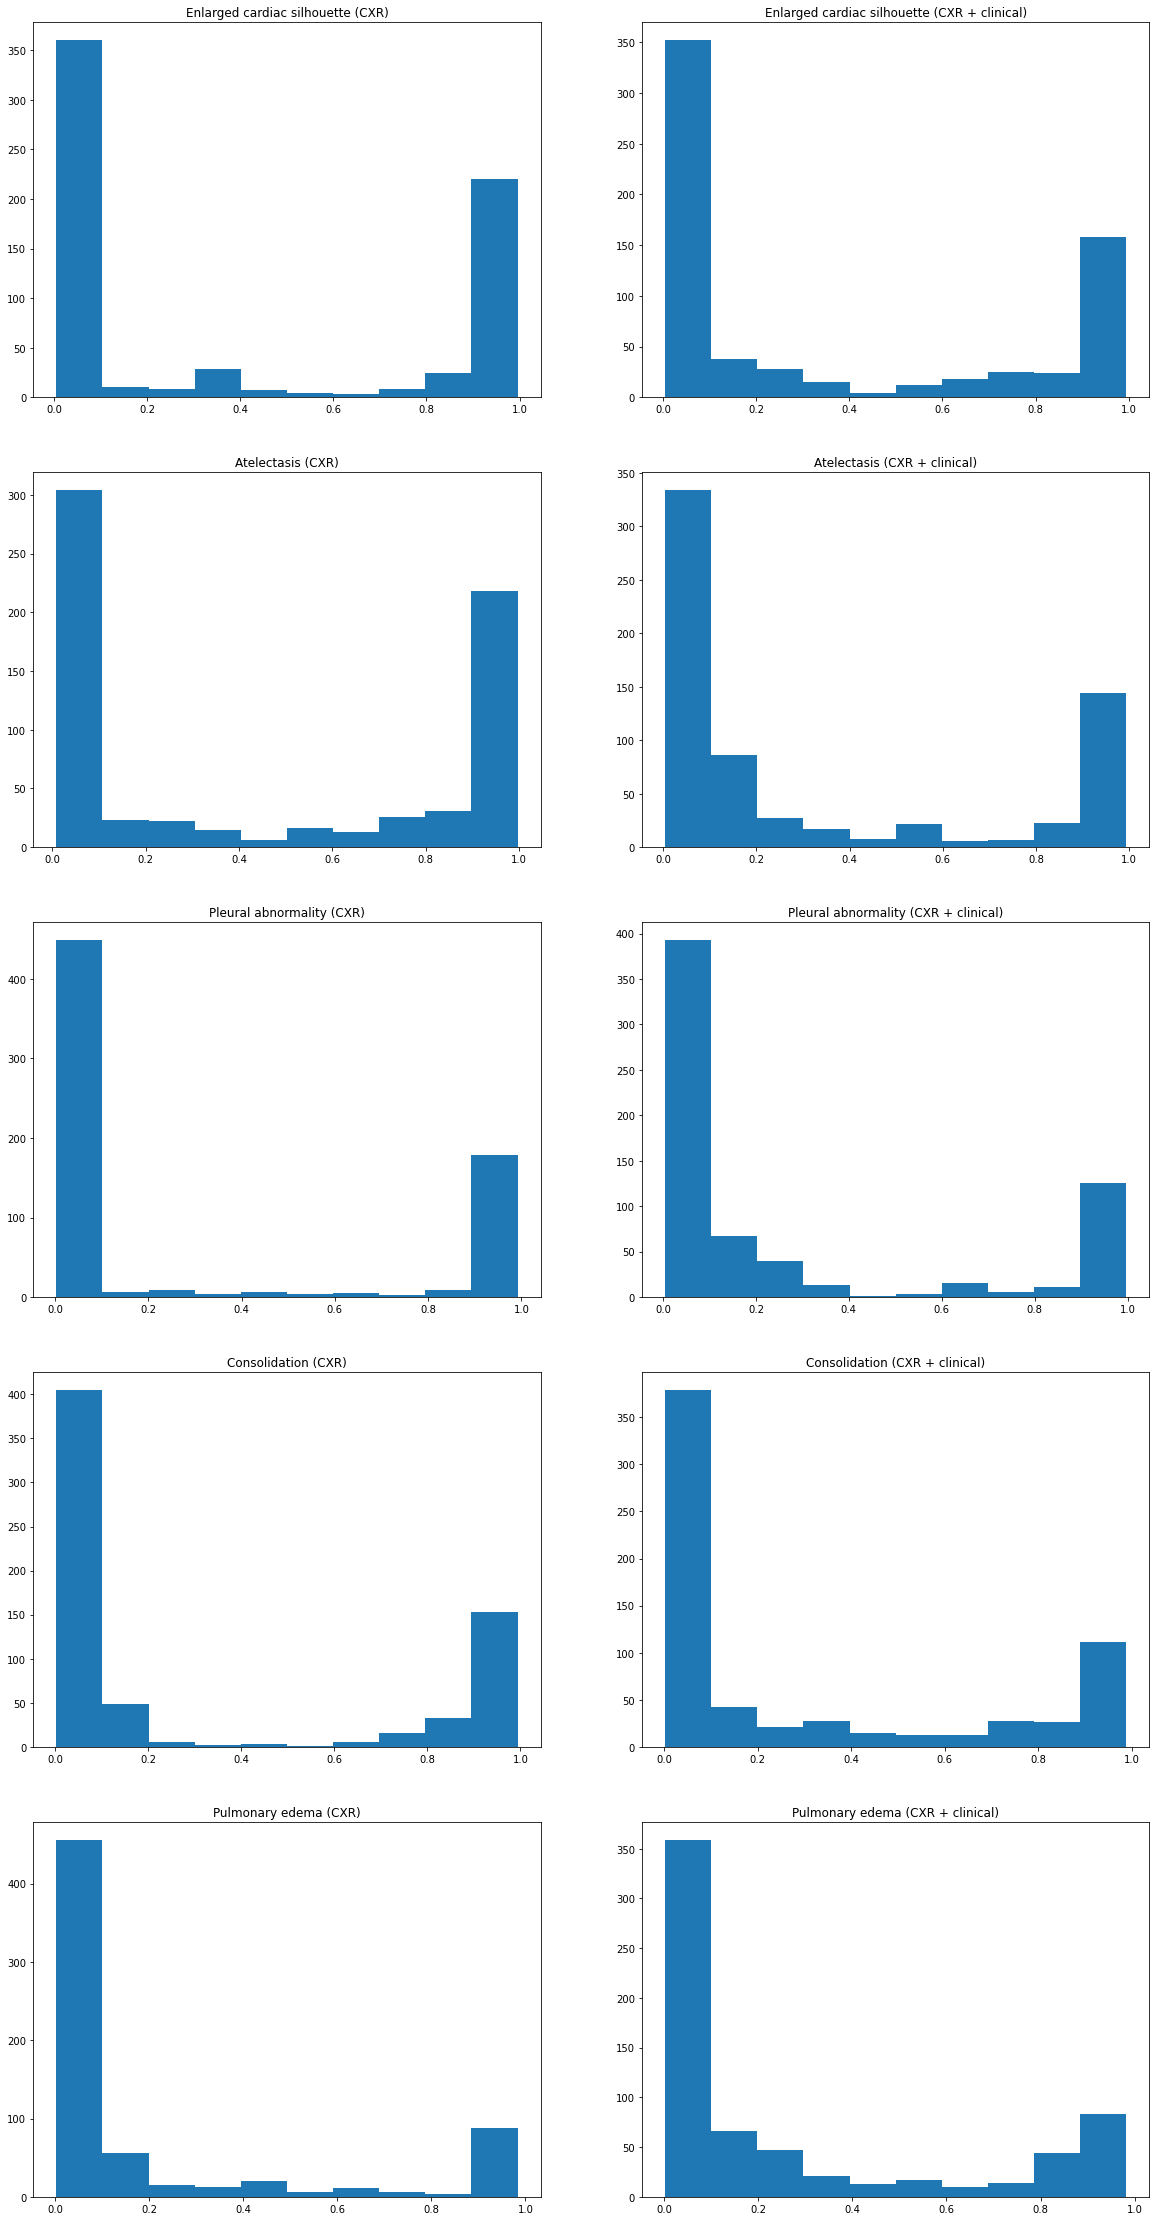

In [10]:
# Checking the normality by hist.
fig, subplots = plt.subplots(len(reflacx_dataset.labels_cols), 2, figsize=(20, 40))

for idx, d in enumerate(reflacx_dataset.labels_cols):
    subplots[idx, 0].set_title(f"{d} (CXR)")
    subplots[idx, 0].hist(combined_df[f'{cxr_prefix}_pred_{d}'])
    subplots[idx, 1].set_title(f"{d} (CXR + clinical)")
    subplots[idx, 1].hist(combined_df[f'{cxr_clinical_prefix}_pred_{d}'])

In [11]:
# Shapiro-Wilk test (Check normality)
for d in reflacx_dataset.labels_cols:
    _, cxr_p =stats.shapiro(combined_df[f'{cxr_prefix}_pred_{d}'])
    _, cxr_clinical_p = stats.shapiro(combined_df[f'{cxr_clinical_prefix}_pred_{d}'])

    print_block(f"CXR {cxr_p} | CXR+Cinical {cxr_clinical_p}",title=f'{d} (Shapiro-Wilk test)')
    


====================Enlarged cardiac silhouette (Shapiro-Wilk test)====================
| CXR 1.1592606269006379e-32 | CXR+Cinical 1.6149051888065563e-31 

====================Atelectasis (Shapiro-Wilk test)====================
| CXR 8.29547491849865e-31 | CXR+Cinical 5.298611903739686e-32 

====================Pleural abnormality (Shapiro-Wilk test)====================
| CXR 1.9499901556144084e-35 | CXR+Cinical 3.230953670765562e-34 

====================Consolidation (Shapiro-Wilk test)====================
| CXR 2.27368272892248e-34 | CXR+Cinical 4.958330974558001e-32 

====================Pulmonary edema (Shapiro-Wilk test)====================
| CXR 1.4272577762153517e-35 | CXR+Cinical 1.137595119907991e-31 


In [12]:
# Wilcoxon signed-rank Test
for d in reflacx_dataset.labels_cols:
    ttest_result = stats.wilcoxon(combined_df[f'{cxr_prefix}_pred_{d}'], combined_df[f'{cxr_clinical_prefix}_pred_{d}'])
    print_block(str(ttest_result), title=f'{d} (Wilcoxon signed-rank Test)')



====================Enlarged cardiac silhouette (Wilcoxon signed-rank Test)====================
| WilcoxonResult(statistic=98798.0, pvalue=0.003133811021395899) 

====================Atelectasis (Wilcoxon signed-rank Test)====================
| WilcoxonResult(statistic=47105.0, pvalue=1.1961509278167424e-39) 

====================Pleural abnormality (Wilcoxon signed-rank Test)====================
| WilcoxonResult(statistic=100796.0, pvalue=0.010491577080005799) 

====================Consolidation (Wilcoxon signed-rank Test)====================
| WilcoxonResult(statistic=76181.0, pvalue=1.112328003694171e-13) 

====================Pulmonary edema (Wilcoxon signed-rank Test)====================
| WilcoxonResult(statistic=71095.0, pvalue=3.3810150502057006e-17) 


In [13]:
# Pair Samples t-test
for d in reflacx_dataset.labels_cols:
    ttest_result = stats.ttest_rel(combined_df[f'{cxr_prefix}_pred_{d}'], combined_df[f'{cxr_clinical_prefix}_pred_{d}'])
    print_block(str(ttest_result), title=f'{d} (Pair Samples t-test)')



====================Enlarged cardiac silhouette (Pair Samples t-test)====================
| Ttest_relResult(statistic=4.85262897683278, pvalue=1.5154657290024969e-06) 

====================Atelectasis (Pair Samples t-test)====================
| Ttest_relResult(statistic=10.999099499365004, pvalue=5.419094000481606e-26) 

====================Pleural abnormality (Pair Samples t-test)====================
| Ttest_relResult(statistic=4.575660036212734, pvalue=5.652733044087444e-06) 

====================Consolidation (Pair Samples t-test)====================
| Ttest_relResult(statistic=2.300830552310817, pvalue=0.02170604114354255) 

====================Pulmonary edema (Pair Samples t-test)====================
| Ttest_relResult(statistic=-7.549792674660103, pvalue=1.4231783157327505e-13) 
